# Task 2: Regression

In the attached file sales.csv there is weekly sales of individual product types.
1. What can be said about the overall trend and seasonality of sales? What of the individual product type?
2. Are there correlations between sales of some product types, and if so, which?
3. Select a single product type and make forecast about its sales for 5 time periods (weeks) from the last observed data point.Note: Please make sure that we can reproduce your results, and feel free to ask questions if needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data overview

In [2]:
complete_df = pd.read_csv("sales.csv")
complete_df["date"] = pd.to_datetime(complete_df["date"])
complete_df

,date,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
0,2018-09-27,19194,21046,12573,10720,3309,9791,26523
1,2018-10-04,13292,14721,6916,7645,2557,6981,17594
2,2018-10-11,19954,20708,7495,9138,3632,9956,23666
3,2018-10-18,17547,20016,7913,9693,3565,7894,20586
4,2018-10-25,17420,20397,8887,12132,3415,7495,19395
...,...,...,...,...,...,...,...,...
98,2020-08-13,10351,29723,2574,2782,9064,8874,19223
99,2020-08-20,11852,25028,6210,6211,4999,7635,21342
100,2020-08-27,11851,19010,9540,8123,2417,6746,17373
101,2020-09-03,10448,17389,9732,8797,1935,6406,15197


In [3]:
complete_df.describe()

,date,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
count,103,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2019-09-19 00:00:00,14372.912621,31115.631068,4555.524272,5675.077670,11146.873786,8951.854369,21097.815534
min,2018-09-27 00:00:00,6718.000000,14134.000000,825.000000,2405.000000,1001.000000,5010.000000,6277.000000
25%,2019-03-24 12:00:00,10525.500000,19910.500000,2686.000000,3698.500000,2280.500000,6744.000000,13732.500000
50%,2019-09-19 00:00:00,12837.000000,24677.000000,4163.000000,5398.000000,3857.000000,8130.000000,20333.000000
75%,2020-03-15 12:00:00,17546.500000,36949.000000,6015.500000,7078.000000,17224.500000,10174.000000,26434.000000
max,2020-09-10 00:00:00,35598.000000,91052.000000,12696.000000,14411.000000,63788.000000,21842.000000,49272.000000
std,NaN,4960.983339,15542.548614,2536.274197,2456.244011,12513.506661,3134.279560,8849.700921


In [4]:
product_only_df = complete_df.drop("date", inplace=False, axis=1)
product_only_df

,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
0,19194,21046,12573,10720,3309,9791,26523
1,13292,14721,6916,7645,2557,6981,17594
2,19954,20708,7495,9138,3632,9956,23666
3,17547,20016,7913,9693,3565,7894,20586
4,17420,20397,8887,12132,3415,7495,19395
...,...,...,...,...,...,...,...
98,10351,29723,2574,2782,9064,8874,19223
99,11852,25028,6210,6211,4999,7635,21342
100,11851,19010,9540,8123,2417,6746,17373
101,10448,17389,9732,8797,1935,6406,15197


Text(0.5, 1.0, 'Sales overview, all products')

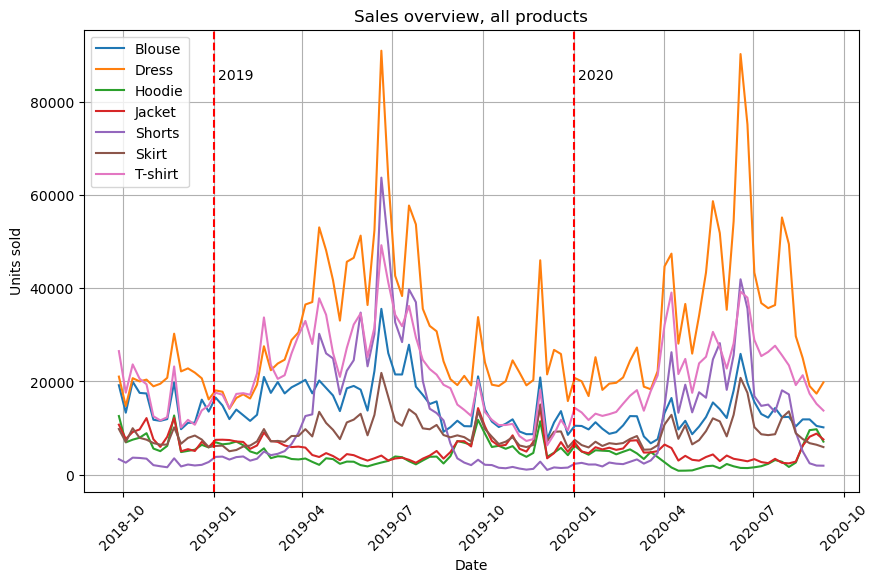

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

for product in product_only_df.columns:
    ax.plot(complete_df["date"], complete_df[product], label=product)

ax.axvline(x=pd.to_datetime("2019-01-01"), ls="dashed", color="red")
ax.axvline(x=pd.to_datetime("2020-01-01"), ls="dashed", color="red")

ax.text(pd.to_datetime("2019-01-05"), 85000, "2019")
ax.text(pd.to_datetime("2020-01-05"), 85000, "2020")

ax.xaxis.grid()
ax.yaxis.grid()
ax.set_ylabel("Units sold")
ax.set_xlabel("Date")
ax.legend(loc=2)
ax.tick_params(axis="x", rotation=45)
ax.set_title("Sales overview, all products")


In [6]:
product_statistics_per_period = pd.DataFrame()

product_statistics_per_period["mean"] = product_only_df.mean(axis=1)
product_statistics_per_period["sum"] = product_only_df.sum(axis=1)
product_statistics_per_period["median"] = product_only_df.median(axis=1)

product_statistics_per_period["max_seller"] = product_only_df.columns[product_only_df.values.argmax(axis=1)]
product_statistics_per_period["min_seller"] = product_only_df.columns[product_only_df.values.argmin(axis=1)]

product_statistics_per_period

,mean,sum,median,max_seller,min_seller
0,14736.571429,103156,12573.0,T-shirt,Shorts
1,9958.000000,69706,7645.0,T-shirt,Shorts
2,13507.000000,94549,9956.0,T-shirt,Shorts
3,12459.142857,87214,9693.0,T-shirt,Shorts
4,12734.428571,89141,12132.0,Dress,Shorts
...,...,...,...,...,...
98,11798.714286,82591,9064.0,Dress,Hoodie
99,11896.714286,83277,7635.0,Dress,Shorts
100,10722.857143,75060,9540.0,Dress,Shorts
101,9986.285714,69904,9732.0,Dress,Shorts


In [7]:
product_statistics_per_period.groupby("max_seller")["sum"].count()

max_seller
Dress      92
T-shirt    11
Name: sum, dtype: int64

In [8]:
product_statistics_per_period.groupby("min_seller")["sum"].count()

min_seller
Hoodie    45
Jacket     3
Shorts    55
Name: sum, dtype: int64

In [9]:
## best period, most items sold
complete_df["date"][product_only_df.values.sum(axis=1).argmax(axis=0)]

Timestamp('2019-06-20 00:00:00')

In [10]:
## worst period, least items sold
complete_df["date"][product_only_df.values.sum(axis=1).argmin(axis=0)]

Timestamp('2019-12-26 00:00:00')

In [11]:
product_statistics_per_product = pd.DataFrame(columns=product_only_df.columns)
product_statistics_per_product

product_statistics_per_product.loc["best_period"] = [complete_df["date"][x] for x in product_only_df.values.argmax(axis=0)]
product_statistics_per_product.loc["worst_period"] = [complete_df["date"][x] for x in product_only_df.values.argmin(axis=0)]

product_statistics_per_product.loc["total_items_sold"] = product_only_df.values.sum(axis=0)

product_statistics_per_product

,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
best_period,2019-06-20 00:00:00,2019-06-20 00:00:00,2018-11-22 00:00:00,2019-11-28 00:00:00,2019-06-20 00:00:00,2019-06-20 00:00:00,2019-06-20 00:00:00
worst_period,2020-03-19 00:00:00,2019-01-17 00:00:00,2020-04-16 00:00:00,2020-08-06 00:00:00,2019-12-05 00:00:00,2019-01-17 00:00:00,2019-12-05 00:00:00
total_items_sold,1480410,3204910,469219,584533,1148128,922041,2173075


#### Notes

- Assumption 1: values are units
- seasonality probablyy over Summer times
- biggest seller: Dresses and Tshirts
- lowest sellers: Hoodie, Jackets, and shorts

### Question 1: What can be said about the overall trend and seasonality of sales? 

#### Trend





In [12]:
trend_df = complete_df.copy()

trend_df = pd.concat([trend_df, product_statistics_per_period], axis=1)
trend_df["year"] = trend_df.apply(lambda x: x["date"].year, axis=1)
trend_df["month"] = trend_df.apply(lambda x: x["date"].month, axis=1)
trend_df['moving_avg'] = trend_df["sum"].rolling(window=4).mean().shift(-2)

trend_df["detrended"] = trend_df["sum"] - trend_df["moving_avg"]

# seasonal component
trend_df["seasonal_component"] = 0 #placeholder

for i in range(1, 13):
    monthly_mean = trend_df.loc[trend_df['month']==i, ['detrended']].mean()['detrended']
    trend_df.loc[trend_df['month']==i, ['seasonal_component']] = monthly_mean

trend_df

,date,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt,mean,sum,median,max_seller,min_seller,year,month,moving_avg,detrended,seasonal_component
0,2018-09-27,19194,21046,12573,10720,3309,9791,26523,14736.571429,103156,12573.0,T-shirt,Shorts,2018,9,NaN,NaN,1810.687500
1,2018-10-04,13292,14721,6916,7645,2557,6981,17594,9958.000000,69706,7645.0,T-shirt,Shorts,2018,10,88656.25,-18950.25,1302.555556
2,2018-10-11,19954,20708,7495,9138,3632,9956,23666,13507.000000,94549,9956.0,T-shirt,Shorts,2018,10,85152.50,9396.50,1302.555556
3,2018-10-18,17547,20016,7913,9693,3565,7894,20586,12459.142857,87214,9693.0,T-shirt,Shorts,2018,10,84026.75,3187.25,1302.555556
4,2018-10-25,17420,20397,8887,12132,3415,7495,19395,12734.428571,89141,12132.0,Dress,Shorts,2018,10,75855.50,13285.50,1302.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-08-13,10351,29723,2574,2782,9064,8874,19223,11798.714286,82591,9064.0,Dress,Hoodie,2020,8,90283.50,-7692.50,2614.861111
99,2020-08-20,11852,25028,6210,6211,4999,7635,21342,11896.714286,83277,7635.0,Dress,Shorts,2020,8,77708.00,5569.00,2614.861111
100,2020-08-27,11851,19010,9540,8123,2417,6746,17373,10722.857143,75060,9540.0,Dress,Shorts,2020,8,73594.75,1465.25,2614.861111
101,2020-09-03,10448,17389,9732,8797,1935,6406,15197,9986.285714,69904,9732.0,Dress,Shorts,2020,9,NaN,NaN,1810.687500


Text(0.5, 1.0, 'Sales overview, stats')

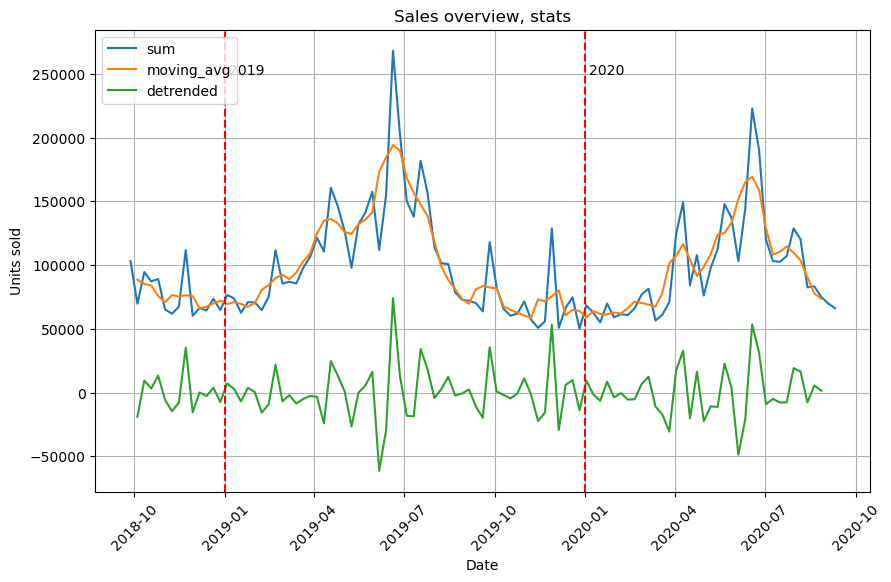

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

for stat in ["sum", "moving_avg", "detrended"]:
    ax.plot(trend_df["date"], trend_df[stat], label=stat)

ax.axvline(x=pd.to_datetime("2019-01-01"), ls="dashed", color="red")
ax.axvline(x=pd.to_datetime("2020-01-01"), ls="dashed", color="red")

ax.text(pd.to_datetime("2019-01-05"), 250000, "2019")
ax.text(pd.to_datetime("2020-01-05"), 250000, "2020")

ax.xaxis.grid()
ax.yaxis.grid()
ax.set_ylabel("Units sold")
ax.set_xlabel("Date")
ax.legend(loc=2)
ax.tick_params(axis="x", rotation=45)
ax.set_title("Sales overview, stats")

In [14]:
monthly_df = trend_df.pivot_table(index="month", columns="year", values="sum", aggfunc=np.sum)
monthly_df

year,2018,2019,2020
month,,,
1,NaN,354627.0,314943.0
2,NaN,337060.0,265381.0
3,NaN,376750.0,269839.0
4,NaN,539157.0,542099.0
5,NaN,655546.0,495322.0
6,NaN,738306.0,660578.0
7,NaN,626637.0,561451.0
8,NaN,467552.0,361134.0
9,103156.0,323945.0,136042.0


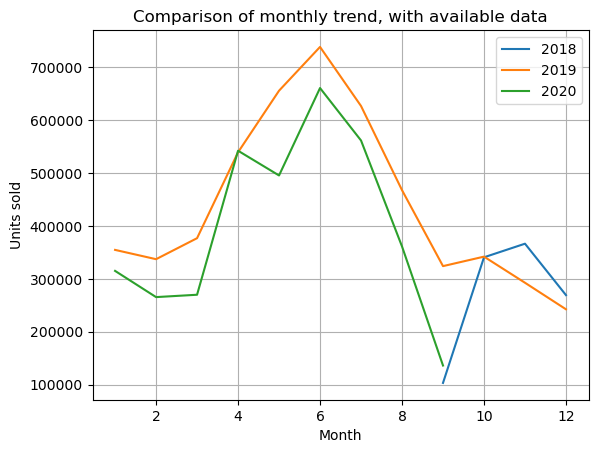

In [15]:
fig, ax = plt.subplots()

for year in monthly_df.columns:
    ax.plot(monthly_df[year].index, monthly_df[year], label=str(year))

ax.set_xlabel("Month")
ax.set_ylabel("Units sold")
ax.legend()
ax.set_title("Comparison of monthly trend, with available data")
ax.xaxis.grid()
ax.yaxis.grid()


#### What of the individual product type?

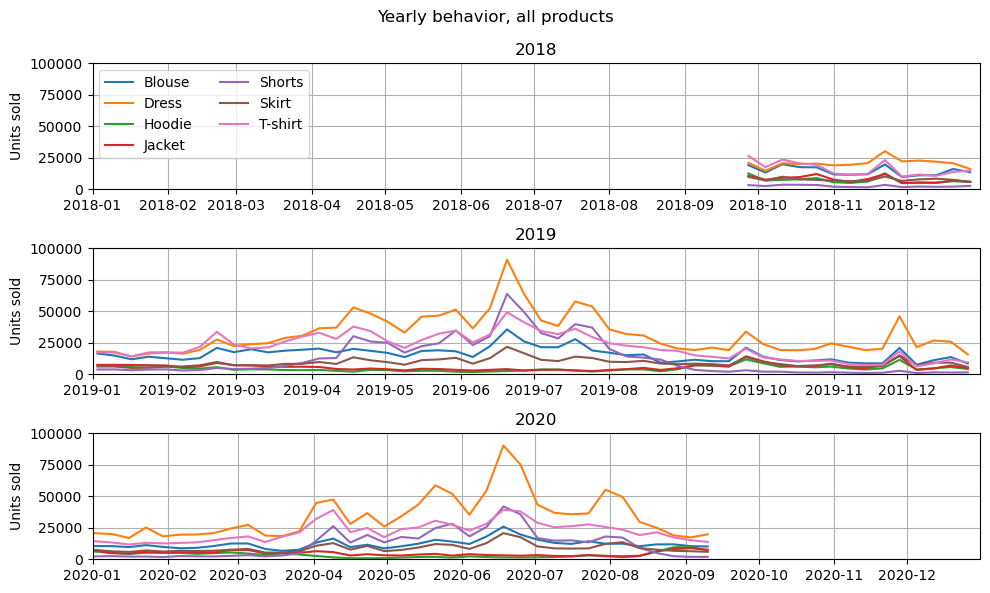

In [16]:
fig, axs = plt.subplots(3,1,figsize=(10,6))

for idx, year in enumerate(trend_df["year"].unique()):
    year_df = trend_df[trend_df["year"] == year]

    for product in product_only_df.columns:
        axs[idx].plot(year_df["date"], year_df[product], label=product)

    axs[idx].set_xlim(pd.to_datetime(str(year) + "-01-01"), pd.to_datetime(str(year) + "-12-31"))
    axs[idx].set_title(year)
    axs[idx].set_ylim(0,100000)
    axs[idx].set_ylabel("Units sold")
    axs[idx].xaxis.grid()
    axs[idx].yaxis.grid()

axs[0].legend(ncol=2)

fig.suptitle("Yearly behavior, all products")
fig.tight_layout()

In [17]:
per_year_df = pd.DataFrame()

for product in product_only_df.columns:
    per_year_df[product] = trend_df.groupby("year")[product].sum() 

# per_year_df = per_year_df.T

per_year_df

,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
year,,,,,,,
2018,204061,290105,100735,111537,35979,108196,228617
2019,826534,1647917,238258,299462,666709,482704,1134713
2020,449815,1266888,130226,173534,445440,331141,809745


No comments can be made about the visualization of year vs product. It is only obvious that the sum per year will be greater in 2019 as that is the only year where we have complete data.

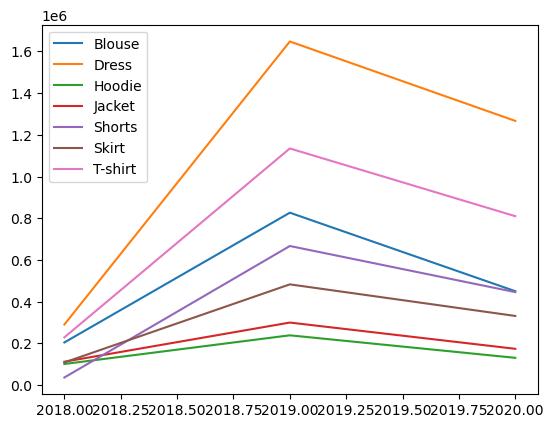

In [18]:
fig, ax = plt.subplots()
for product in product_only_df.columns:
    ax.plot(per_year_df.index, per_year_df[product], label=product )

ax.legend()

####  Seasonality
A yearly seasonal trend can be appreciated in the data

### Question 2:
Are there correlations between sales of some product types, and if so, which?

Text(0.5, 1.0, 'Correlation matrix of products')

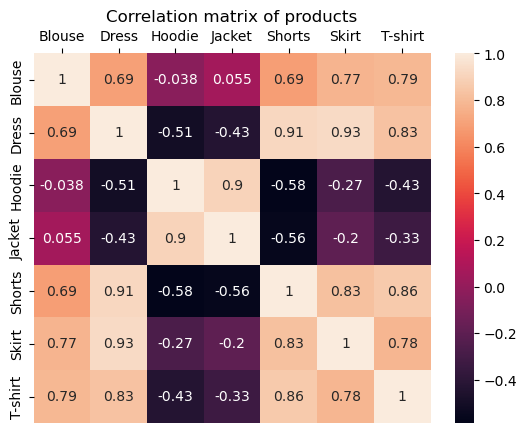

In [19]:
ax = sns.heatmap(product_only_df.corr(), annot=True)
ax.xaxis.tick_top()
plt.title("Correlation matrix of products")

- There are two main groups: {Blouse, Dress, Shorts, Skirt, T-shirt} and {Jacket, Hoodie}
- Jackets and Hoodies are only bought together. The best periods for hoodies and jackest was 2018-11-22, and 2019-11-28 respectively. People only buy them to prepare for the cold weather. 

Text(0.5, 0.98, 'Two correlation groups')

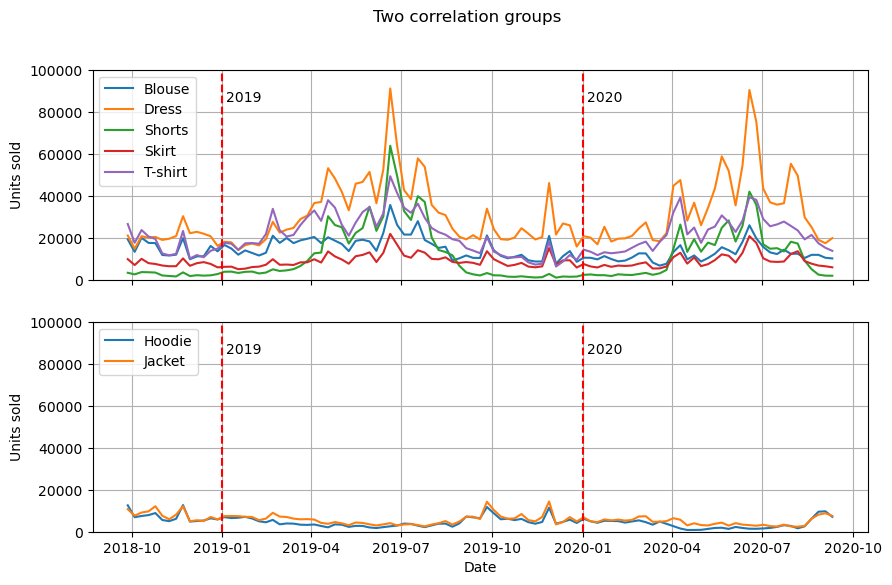

In [20]:
fig, axs = plt.subplots(2,1,figsize=(10,6))

groupA = ["Blouse", "Dress","Shorts", "Skirt","T-shirt"]
groupB = ["Hoodie", "Jacket"]

for product in groupA:
    axs[0].plot(complete_df["date"], complete_df[product], label=product)
for product in groupB:
    axs[1].plot(complete_df["date"], complete_df[product], label=product)

# only top graph
axs[0].set_xticklabels([])

# only bottom graph
axs[1].set_xlabel("Date")

for ax in axs:
    ax.legend(loc=2)
    ax.axvline(x=pd.to_datetime("2019-01-01"), ls="dashed", color="red")
    ax.axvline(x=pd.to_datetime("2020-01-01"), ls="dashed", color="red")
    ax.set_ylim(0,100000)
    ax.text(pd.to_datetime("2019-01-05"), 85000, "2019")
    ax.text(pd.to_datetime("2020-01-05"), 85000, "2020")
    ax.set_ylabel("Units sold")
    ax.xaxis.grid()
    ax.yaxis.grid()

fig.suptitle("Two correlation groups")

A third groupd can be seen as Shorts are not very well sold at the end of the year, as the other products do.

### Question 3:

Select a single product type and make forecast about its sales for 5 time periods (weeks) from the last observed data point.Note: Please make sure that we can reproduce your results, and feel free to ask questions if needed

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from datetime import timedelta
from sklearn.metrics import r2_score

Text(0.5, 0.98, 'Dress sales during the year')

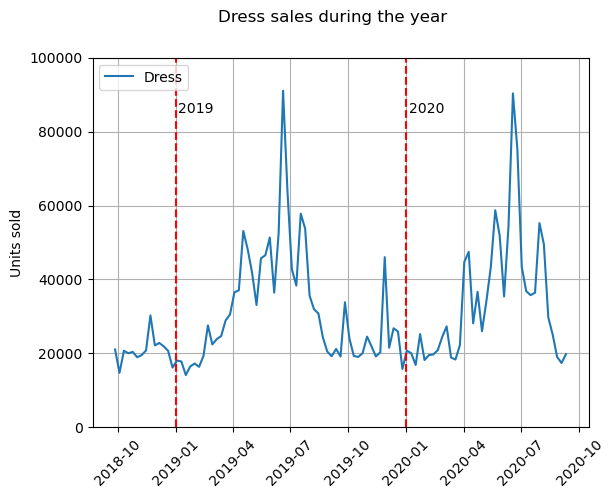

In [22]:
fig, ax = plt.subplots()

product= "Dress"

ax.plot(complete_df["date"], complete_df[product], label=product)

ax.legend(loc=2)
ax.axvline(x=pd.to_datetime("2019-01-01"), ls="dashed", color="red")
ax.axvline(x=pd.to_datetime("2020-01-01"), ls="dashed", color="red")
ax.set_ylim(0,100000)
ax.text(pd.to_datetime("2019-01-05"), 85000, "2019")
ax.text(pd.to_datetime("2020-01-05"), 85000, "2020")
ax.set_ylabel("Units sold")
ax.xaxis.grid()
ax.yaxis.grid()
ax.tick_params(axis="x", rotation=45)

fig.suptitle("Dress sales during the year")


Prepare dataset and feature engineering

In [23]:
lag_feature_count = 25
product = "Dress"

def get_regression_df(lag_feature_count, product):
    """feature to generate the regression data that will be used"""

    regression_df = complete_df[["date", product]].copy()
    regression_df["month"] = regression_df.apply(lambda x: x["date"].month, axis=1)
    regression_df["week_no"] = regression_df.apply(lambda x: x["date"].weekofyear, axis=1)

    dataframe = pd.DataFrame()
    for i in range(lag_feature_count, 0, -1):
        dataframe['t-' + str(i)] = complete_df[product].shift(i)
    regression_df = pd.concat([regression_df, dataframe], axis=1)
    regression_df.dropna(inplace=True)

    return regression_df

regression_df = get_regression_df(lag_feature_count, product)
print(regression_df.columns)
regression_df

Index(['date', 'Dress', 'month', 'week_no', 't-25', 't-24', 't-23', 't-22',
       't-21', 't-20', 't-19', 't-18', 't-17', 't-16', 't-15', 't-14', 't-13',
       't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1'],
      dtype='object')


,date,Dress,month,week_no,t-25,t-24,t-23,t-22,t-21,t-20,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
25,2019-03-21,28891,3,12,21046.0,14721.0,20708.0,20016.0,20397.0,18957.0,...,17795.0,14134.0,16461.0,17244.0,16342.0,19316.0,27566.0,22419.0,23853.0,24677.0
26,2019-03-28,30547,3,13,14721.0,20708.0,20016.0,20397.0,18957.0,19511.0,...,14134.0,16461.0,17244.0,16342.0,19316.0,27566.0,22419.0,23853.0,24677.0,28891.0
27,2019-04-04,36532,4,14,20708.0,20016.0,20397.0,18957.0,19511.0,20791.0,...,16461.0,17244.0,16342.0,19316.0,27566.0,22419.0,23853.0,24677.0,28891.0,30547.0
28,2019-04-11,37059,4,15,20016.0,20397.0,18957.0,19511.0,20791.0,30262.0,...,17244.0,16342.0,19316.0,27566.0,22419.0,23853.0,24677.0,28891.0,30547.0,36532.0
29,2019-04-18,53106,4,16,20397.0,18957.0,19511.0,20791.0,30262.0,22161.0,...,16342.0,19316.0,27566.0,22419.0,23853.0,24677.0,28891.0,30547.0,36532.0,37059.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-08-13,29723,8,33,20867.0,24443.0,27297.0,18882.0,18327.0,22220.0,...,35397.0,54419.0,90338.0,75223.0,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0
99,2020-08-20,25028,8,34,24443.0,27297.0,18882.0,18327.0,22220.0,44734.0,...,54419.0,90338.0,75223.0,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0,29723.0
100,2020-08-27,19010,8,35,27297.0,18882.0,18327.0,22220.0,44734.0,47460.0,...,90338.0,75223.0,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0,29723.0,25028.0
101,2020-09-03,17389,9,36,18882.0,18327.0,22220.0,44734.0,47460.0,28122.0,...,75223.0,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0,29723.0,25028.0,19010.0


Prepare dataset used to store results

In [24]:
predictions_df = regression_df.iloc[-1].to_frame().T
predictions_df

,date,Dress,month,week_no,t-25,t-24,t-23,t-22,t-21,t-20,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
102,2020-09-10,19805,9,37,18327.0,22220.0,44734.0,47460.0,28122.0,36649.0,...,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0,29723.0,25028.0,19010.0,17389.0


Split into training/testing dataset

In [25]:
dates = regression_df["date"]

regression_df = regression_df.drop(['date'], axis=1)
regression_df = regression_df.reset_index(drop=True)
test_length=10
train_test_division = regression_df.shape[0] - test_length

regression_df_train = regression_df.loc[:train_test_division - 1, :]
regression_df_test = regression_df.loc[train_test_division:, :]

regression_df_train_x = regression_df_train.loc[:, regression_df_train.columns != product ]
regression_df_train_y = regression_df_train[product]

regression_df_test_x = regression_df_test.loc[:, regression_df_test.columns != product]
regression_df_test_y = regression_df_test[product]


Fit regressor

In [26]:
# reg = RFE(RandomForestRegressor(n_estimators=100, random_state=1), n_features_to_select=5)
reg = RandomForestRegressor(n_estimators=100, random_state=1)
fit = reg.fit(regression_df_train_x, regression_df_train_y)
y_pred = fit.predict(regression_df_test_x)

r2_score(regression_df_test_y, y_pred)

0.40865850663831527

Predict next 5 time periods

In [27]:

# last date
pd.to_datetime("2020-09-10") + timedelta(days=7)

# prepare df with features that will be needed to do online prediction
future_dates = [pd.to_datetime("2020-09-10") + timedelta(days=x*7) for x in range(1,6)]
future_df = pd.DataFrame({"date":future_dates})
future_df["month"] = future_df.apply(lambda x: x["date"].month, axis=1)
future_df["week_no"] = future_df.apply(lambda x: x["date"].weekofyear, axis=1)

## predict and add new 
for idx in range(future_df.shape[0]):

    new_prediction = future_df.iloc[idx].copy()

    for i in range(lag_feature_count, 0, -1):
        new_prediction['t-' + str(i)] = regression_df[product].iloc[-i]

    date = new_prediction["date"]
    new_prediction.drop("date", inplace=True)
    new_prediction["Dress"] = fit.predict(new_prediction.values.reshape(1, -1))[0]

    new_prediction["date"] = date
    print(f"Date: {date}, Prediction {new_prediction['Dress']}")

    regression_df = pd.concat([regression_df, new_prediction.to_frame().T], axis=0, ignore_index=True)
    predictions_df = pd.concat([predictions_df, new_prediction.to_frame().T], axis=0, ignore_index=True)


/home/jmoro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jmoro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jmoro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jmoro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Date: 2020-09-17 00:00:00, Prediction 22468.72
Date: 2020-09-24 00:00:00, Prediction 27356.52
Date: 2020-10-01 00:00:00, Prediction 24134.66
Date: 2020-10-08 00:00:00, Prediction 21805.57
Date: 2020-10-15 00:00:00, Prediction 21425.75


/home/jmoro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
predictions_df

,date,Dress,month,week_no,t-25,t-24,t-23,t-22,t-21,t-20,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,2020-09-10,19805,9,37,18327.0,22220.0,44734.0,47460.0,28122.0,36649.0,...,43398.0,36839.0,35751.0,36417.0,55225.0,49501.0,29723.0,25028.0,19010.0,17389.0
1,2020-09-17,22468.72,9,38,22220,44734,47460,28122,36649,25983,...,36839,35751,36417,55225,49501,29723,25028,19010,17389,19805
2,2020-09-24,27356.52,9,39,44734,47460,28122,36649,25983,34154,...,35751,36417,55225,49501,29723,25028,19010,17389,19805,22468.72
3,2020-10-01,24134.66,10,40,47460,28122,36649,25983,34154,43405,...,36417,55225,49501,29723,25028,19010,17389,19805,22468.72,27356.52
4,2020-10-08,21805.57,10,41,28122,36649,25983,34154,43405,58726,...,55225,49501,29723,25028,19010,17389,19805,22468.72,27356.52,24134.66
5,2020-10-15,21425.75,10,42,36649,25983,34154,43405,58726,51869,...,49501,29723,25028,19010,17389,19805,22468.72,27356.52,24134.66,21805.57


Plot results

Text(0.5, 0.98, 'Predicted Dress sales')

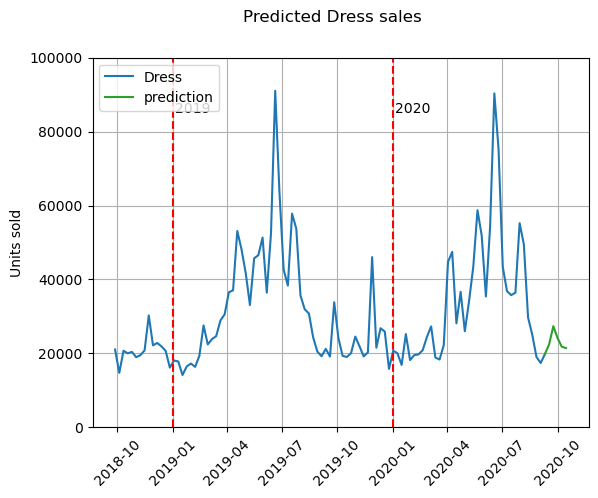

In [29]:
fig, ax = plt.subplots()

product= "Dress"

ax.plot(complete_df["date"], complete_df[product], label=product)
ax.plot(predictions_df["date"].iloc[-6:], predictions_df[product].iloc[-6:], label="prediction", c="tab:green")


ax.legend(loc=2)
ax.axvline(x=pd.to_datetime("2019-01-01"), ls="dashed", color="red")
ax.axvline(x=pd.to_datetime("2020-01-01"), ls="dashed", color="red")
ax.set_ylim(0,100000)
ax.text(pd.to_datetime("2019-01-05"), 85000, "2019")
ax.text(pd.to_datetime("2020-01-05"), 85000, "2020")
ax.set_ylabel("Units sold")
ax.xaxis.grid()
ax.yaxis.grid()
ax.tick_params(axis="x", rotation=45)

fig.suptitle("Predicted Dress sales")